In [7]:
import pandas as pd

# Assuming this function needs to be defined:
def fahrenheit_to_celsius(temp_f):
    return (temp_f - 32) * 5/9

class CornGDD:
    def __init__(self, daily_temp_df, time_column, min_temp_column, max_temp_column, celsius=True):
        self.daily_temp_df = daily_temp_df
        self.time_column = time_column
        self.min_temp_column = min_temp_column
        self.max_temp_column = max_temp_column
        self.celsius = celsius

        # Ensure the time column is of datetime type
        self.daily_temp_df[self.time_column] = pd.to_datetime(self.daily_temp_df[self.time_column])

        # Convert the temperature to Celsius if required
        if not self.celsius:
            self.daily_temp_df[self.min_temp_column] = self.daily_temp_df[self.min_temp_column].apply(fahrenheit_to_celsius)
            self.daily_temp_df[self.max_temp_column] = self.daily_temp_df[self.max_temp_column].apply(fahrenheit_to_celsius)
    
    def con_gdd(self, start_date, end_date):
        start_date = pd.Timestamp(start_date)
        end_date = pd.Timestamp(end_date)

        date_mask = (self.daily_temp_df[self.time_column] >= start_date) & (self.daily_temp_df[self.time_column] <= end_date)
        masked_data = self.daily_temp_df.loc[date_mask].copy()

        gdd_values = []
        cumulative_gdd = 0

        for index, row in masked_data.iterrows():
            min_temp = max(row[self.min_temp_column], 10 if self.celsius else 50)
            max_temp = min(row[self.max_temp_column], 30 if self.celsius else 86)

            mean_temp = (min_temp + max_temp) / 2
            base_temp = 10 if self.celsius else 50
            gdd = max(mean_temp - base_temp, 0)

            gdd_values.append(gdd)
            cumulative_gdd += gdd

        masked_data['GDD'] = gdd_values
        masked_data['Cumulative_GDD'] = masked_data['GDD'].cumsum()

        return masked_data

In [8]:
import pandas as pd

Wadena = pd.read_csv("Wadena_County_NOAA_nClimGrid.csv")
Cass = pd.read_csv("Cass_County_NOAA_nClimGrid.csv")
Crow_Wing = pd.read_csv("Crow_Wing_County_NOAA_nClimGrid.csv")
Todd = pd.read_csv("Todd_County_NOAA_nClimGrid.csv")
Morrison = pd.read_csv("Morrison_County_NOAA_nClimGrid.csv")
Douglas = pd.read_csv("Douglas_County_NOAA_nClimGrid.csv")
Otter_Tail = pd.read_csv("Otter_Tail_County_NOAA_nClimGrid.csv")
Pope = pd.read_csv("Pope_County_NOAA_nClimGrid.csv")
Stearns = pd.read_csv("Stearns_County_NOAA_nClimGrid.csv")
Sherburne = pd.read_csv("Sherburne_County_NOAA_nClimGrid.csv")
Benton = pd.read_csv("Benton_County_NOAA_nClimGrid.csv")
Becker = pd.read_csv("Becker_County_NOAA_nClimGrid.csv")
Hubbard= pd.read_csv("Hubbard_County_NOAA_nClimGrid.csv")
Kandiyohi= pd.read_csv("Kandiyohi_County_NOAA_nClimGrid.csv")

In [9]:
import pandas as pd

# Function to convert Celsius to Fahrenheit
def celsius_to_fahrenheit(c):
    return (c * 9/5)

# Dictionary of county DataFrames
county_dfs = {
    "Wadena": Wadena,
    "Cass": Cass,
    "Crow_Wing": Crow_Wing,
    "Todd": Todd,
    "Morrison": Morrison,
    "Douglas": Douglas,
    "Otter_Tail": Otter_Tail,
    "Pope": Pope,
    "Stearns": Stearns,
    "Sherburne": Sherburne,
    "Benton": Benton,
    "Becker": Becker,
    "Hubbard": Hubbard,
    "Kandiyohi": Kandiyohi
}

# Loop through each county
for county_name, df in county_dfs.items():
    df['time'] = pd.to_datetime(df['time'])
    all_years = []

    for year in range(1951, 2025):
        corn = CornGDD(df, 'time', 'tmin', 'tmax')  # Output in Celsius
        start = pd.to_datetime(f"{year}-04-15").date()
        end = pd.to_datetime(f"{year}-12-31").date()

        gdd_df = corn.con_gdd(start, end)
        gdd_df['Year'] = year

        # Manually convert GDD to Fahrenheit
        gdd_df['GDD'] = gdd_df['GDD'].apply(celsius_to_fahrenheit)
        gdd_df['Cumulative_GDD'] = gdd_df['GDD'].cumsum()

        all_years.append(gdd_df)

    historical_df = pd.concat(all_years, ignore_index=True)
    historical_df.to_csv(f"{county_name}_growing2024_Corn_GDD_1951_2024.csv", index=False)
    print(f"Saved: {county_name}_growing2024_Corn_GDD_1951_2024.csv")


Saved: Wadena_growing2024_Corn_GDD_1951_2024.csv
Saved: Cass_growing2024_Corn_GDD_1951_2024.csv
Saved: Crow_Wing_growing2024_Corn_GDD_1951_2024.csv
Saved: Todd_growing2024_Corn_GDD_1951_2024.csv
Saved: Morrison_growing2024_Corn_GDD_1951_2024.csv
Saved: Douglas_growing2024_Corn_GDD_1951_2024.csv
Saved: Otter_Tail_growing2024_Corn_GDD_1951_2024.csv
Saved: Pope_growing2024_Corn_GDD_1951_2024.csv
Saved: Stearns_growing2024_Corn_GDD_1951_2024.csv
Saved: Sherburne_growing2024_Corn_GDD_1951_2024.csv
Saved: Benton_growing2024_Corn_GDD_1951_2024.csv
Saved: Becker_growing2024_Corn_GDD_1951_2024.csv
Saved: Hubbard_growing2024_Corn_GDD_1951_2024.csv
Saved: Kandiyohi_growing2024_Corn_GDD_1951_2024.csv


In [10]:
import pandas as pd
from datetime import datetime, timedelta

# Function to convert Celsius GDD to Fahrenheit GDD
def celsius_to_fahrenheit(c):
    return c * 9 / 5

# Function to get list of planting dates
def generate_planting_dates(start_date, end_date):
    return [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]

# Dictionary of your county dataframes (make sure they are defined properly)
county_dfs = {
    "Wadena": Wadena,
    "Cass": Cass,
    "Crow_Wing": Crow_Wing,
    "Todd": Todd,
    "Morrison": Morrison,
    "Douglas": Douglas,
    "Otter_Tail": Otter_Tail,
    "Pope": Pope,
    "Stearns": Stearns,
    "Sherburne": Sherburne,
    "Benton": Benton,
    "Becker": Becker,
    "Hubbard": Hubbard,
    "Kandiyohi": Kandiyohi
}

# Loop through each county and year
for county_name, df in county_dfs.items():
    df['time'] = pd.to_datetime(df['time'])

    all_planting_results = []
    for year in range(1951, 2025):
        corn = CornGDD(df, 'time', 'tmin', 'tmax')  # Your existing GDD class
        start_year = pd.to_datetime(f"{year}-04-15")
        end_year = pd.to_datetime(f"{year}-12-31")
        full_gdd_df = corn.con_gdd(start_year.date(), end_year.date())
        full_gdd_df['time'] = pd.to_datetime(full_gdd_df['time'])
        full_gdd_df['GDD'] = celsius_to_fahrenheit(full_gdd_df['GDD'])

        planting_dates = generate_planting_dates(pd.to_datetime(f"{year}-04-15"), pd.to_datetime(f"{year}-06-15"))

        for planting_date in planting_dates:
            sub_df = full_gdd_df[full_gdd_df['time'] >= planting_date].copy()
            sub_df['Year'] = year
            sub_df['Planting Date'] = planting_date.date()
            sub_df['DAP'] = (sub_df['time'] - planting_date).dt.days
            sub_df['Cumulative_GDD'] = sub_df['GDD'].cumsum()
            all_planting_results.append(sub_df)

    historical_df = pd.concat(all_planting_results, ignore_index=True)
    output_name = f"{county_name}_AllPlantingDates_Corn_GDD_1951_2024.csv"
    historical_df.to_csv(output_name, index=False)
    print(f"Saved: {output_name}")


Saved: Wadena_AllPlantingDates_Corn_GDD_1951_2024.csv
Saved: Cass_AllPlantingDates_Corn_GDD_1951_2024.csv
Saved: Crow_Wing_AllPlantingDates_Corn_GDD_1951_2024.csv
Saved: Todd_AllPlantingDates_Corn_GDD_1951_2024.csv
Saved: Morrison_AllPlantingDates_Corn_GDD_1951_2024.csv
Saved: Douglas_AllPlantingDates_Corn_GDD_1951_2024.csv
Saved: Otter_Tail_AllPlantingDates_Corn_GDD_1951_2024.csv
Saved: Pope_AllPlantingDates_Corn_GDD_1951_2024.csv
Saved: Stearns_AllPlantingDates_Corn_GDD_1951_2024.csv
Saved: Sherburne_AllPlantingDates_Corn_GDD_1951_2024.csv
Saved: Benton_AllPlantingDates_Corn_GDD_1951_2024.csv
Saved: Becker_AllPlantingDates_Corn_GDD_1951_2024.csv
Saved: Hubbard_AllPlantingDates_Corn_GDD_1951_2024.csv
Saved: Kandiyohi_AllPlantingDates_Corn_GDD_1951_2024.csv


In [6]:
import pandas as pd

# Load datasets
becker = pd.read_csv("Becker 2024 corn Growth staging.csv")
wadena = pd.read_csv("Wadena_AllPlantingDates_Corn_GDD_1951_2024.csv")

# Clean up
becker.columns = becker.columns.str.strip()
becker["Date"] = pd.to_datetime(becker["Date"] + "-2024", format="%d-%b-%Y", errors="coerce")
wadena["time"] = pd.to_datetime(wadena["time"])
wadena["Planting Date"] = pd.to_datetime(wadena["Planting Date"])

# Becker AGDD thresholds (mode per stage)
stages = ['VE', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10','VT', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6']
thresholds = (becker
              .groupby("Growth Stage")["AGDD"]
              .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
              .dropna()
              .loc[stages]
              .reset_index())
thresholds.columns = ["Stage", "AGDD Threshold"]

# Process by (Year, Planting Date)
results = []
for (year, planting), group in wadena.groupby(["Year", "Planting Date"]):
    group = group[group["time"] >= planting].copy()
    group = group.sort_values("time")
    group["Cumulative_GDD"] = group["GDD"].cumsum()

    for _, row in thresholds.iterrows():
        stage = row["Stage"]
        agdd_thresh = row["AGDD Threshold"]
        met = group[group["Cumulative_GDD"] >= agdd_thresh]

        if not met.empty:
            first_hit = met.iloc[0]
            dap = (first_hit["time"] - planting).days
            results.append({
                "Crop": "Corn",
                "County": "Wadena",
                "Year": year,
                "Planting Date": planting.date(),
                "Stage": stage,
                "AGDD Threshold (°F)": round(agdd_thresh, 2),
                "DAP Reached": dap,
                "AGDD Reached (°F)": round(first_hit["Cumulative_GDD"], 1)
            })
        else:
            results.append({
                "Crop": "Corn",
                "County": "Wadena",
                "Year": year,
                "Planting Date": planting.date(),
                "Stage": stage,
                "AGDD Threshold (°F)": round(agdd_thresh, 2),
                "DAP Reached": "",
                "AGDD Reached (°F)": ""
            })

# Save results
final_df = pd.DataFrame(results)
final_df.to_csv("Wadena_Corn_GrowthStages_1951_2022_AllPlantingDates.csv", index=False)
print("File saved.")


File saved.


In [13]:
import pandas as pd
import os

# List of all counties
counties = [
    "Wadena", "Cass", "Crow_Wing", "Todd", "Morrison", "Douglas",
    "Otter_Tail", "Pope", "Stearns", "Sherburne", "Benton",
     "Hubbard", "Kandiyohi"
]

# Load Becker 2024 growth stages
becker = pd.read_csv("Becker 2024 corn Growth staging.csv")
becker.columns = becker.columns.str.strip()
becker["Date"] = pd.to_datetime(becker["Date"] + "-2024", format="%d-%b-%Y", errors="coerce")

# Extract mode AGDD threshold per stage
stages = ['VE', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'VT', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6']
thresholds = (becker
              .groupby("Growth Stage")["AGDD"]
              .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
              .dropna()
              .loc[stages]
              .reset_index())
thresholds.columns = ["Stage", "AGDD Threshold"]

# Output folder
os.makedirs("AllCounties_CornGrowthStages_1951_2022", exist_ok=True)

# Process each county
for county in counties:
    input_file = f"{county}_AllPlantingDates_Corn_GDD_1951_2024.csv"
    if not os.path.exists(input_file):
        print(f"File not found: {input_file}")
        continue

    df = pd.read_csv(input_file)
    df["time"] = pd.to_datetime(df["time"])
    df["Planting Date"] = pd.to_datetime(df["Planting Date"])

    results = []
    for (year, planting), group in df.groupby(["Year", "Planting Date"]):
        group = group[group["time"] >= planting].copy()
        group = group.sort_values("time")
        group["Cumulative_GDD"] = group["GDD"].cumsum()

        for _, row in thresholds.iterrows():
            stage = row["Stage"]
            agdd_thresh = row["AGDD Threshold"]
            met = group[group["Cumulative_GDD"] >= agdd_thresh]

            if not met.empty:
                first_hit = met.iloc[0]
                dap = (first_hit["time"] - planting).days
                results.append({
                    "Crop": "Corn",
                    "County": county,
                    "Year": year,
                    "Planting Date": planting.date(),
                    "Stage": stage,
                    "AGDD Threshold (°F)": round(agdd_thresh, 2),
                    "DAP Reached": dap,
                    "AGDD Reached (°F)": round(first_hit["Cumulative_GDD"], 1)
                })
            else:
                results.append({
                    "Crop": "Corn",
                    "County": county,
                    "Year": year,
                    "Planting Date": planting.date(),
                    "Stage": stage,
                    "AGDD Threshold (°F)": round(agdd_thresh, 2),
                    "DAP Reached": "",
                    "AGDD Reached (°F)": ""
                })

    # Save per county
    out_df = pd.DataFrame(results)
    out_df.to_csv(f"AllCounties_CornGrowthStages_1951_2022/{county}_Corn_GrowthStages_1951_2022.csv", index=False)
    print(f"Saved: {county}_Corn_GrowthStages_1951_2022.csv")


Saved: Wadena_Corn_GrowthStages_1951_2022.csv
Saved: Cass_Corn_GrowthStages_1951_2022.csv
Saved: Crow_Wing_Corn_GrowthStages_1951_2022.csv
Saved: Todd_Corn_GrowthStages_1951_2022.csv
Saved: Morrison_Corn_GrowthStages_1951_2022.csv
Saved: Douglas_Corn_GrowthStages_1951_2022.csv
Saved: Otter_Tail_Corn_GrowthStages_1951_2022.csv
Saved: Pope_Corn_GrowthStages_1951_2022.csv
Saved: Stearns_Corn_GrowthStages_1951_2022.csv
Saved: Sherburne_Corn_GrowthStages_1951_2022.csv
Saved: Benton_Corn_GrowthStages_1951_2022.csv
Saved: Hubbard_Corn_GrowthStages_1951_2022.csv
Saved: Kandiyohi_Corn_GrowthStages_1951_2022.csv


In [19]:
import pandas as pd
import os

# All counties
counties = [
    "Wadena", "Cass", "Crow_Wing", "Todd", "Morrison", "Douglas",
    "Otter_Tail", "Pope", "Stearns", "Sherburne", "Benton",
    "Hubbard", "Kandiyohi"
]
output_folder = "AllCounties_CornGrowthStages_1951_2022_withBeckerRef"
os.makedirs(output_folder, exist_ok=True)

# === Step 1: Load Becker 2024 thresholds for corn ===
becker = pd.read_csv("Becker 2024 corn Growth staging.csv")  # <-- Update filename accordingly
becker.columns = becker.columns.str.strip()
becker["Date"] = pd.to_datetime(becker["Date"] + "-2024", format="%d-%b-%Y", errors="coerce")

# Set reference planting date
planting_date_2024 = pd.Timestamp("2024-05-01")

# Define ordered corn stages
ordered_stages = [
    'VE', 'V2', 'V4', 'V6', 'V8', 'VT','R1', 'R2', 'R3', 'R4', 'R5', 'R6'
]
becker_stage_data = becker[["Growth Stage", "Date", "AGDD"]].dropna()
becker_stage_data["Becker DAP"] = (becker_stage_data["Date"] - planting_date_2024).dt.days
becker_thresholds = (
    becker_stage_data
    .drop_duplicates("Growth Stage")[["Growth Stage", "AGDD", "Becker DAP"]]
    .rename(columns={"Growth Stage": "Stage", "AGDD": "Becker AGDD"})
)
becker_thresholds = becker_thresholds[becker_thresholds["Stage"].isin(ordered_stages)].reset_index(drop=True)

# === Step 2: Process Each County ===
for county in counties:
    input_file = f"{county}_AllPlantingDates_Corn_GDD_1951_2024.csv"  # <-- Update filename accordingly
    if not os.path.exists(input_file):
        print(f"File not found: {input_file}")
        continue

    df = pd.read_csv(input_file)
    df["time"] = pd.to_datetime(df["time"])
    df["Planting Date"] = pd.to_datetime(df["Planting Date"])
    df = df[df["Year"].between(1951, 2025)].copy()

    results = []
    for (year, planting), group in df.groupby(["Year", "Planting Date"]):
        group = group[group["time"] >= planting].sort_values("time").copy()
        group["Cumulative_GDD"] = group["GDD"].cumsum()

        for _, row in becker_thresholds.iterrows():
            stage = row["Stage"]
            becker_agdd = row["Becker AGDD"]
            becker_dap = row["Becker DAP"]

            met = group[group["Cumulative_GDD"] >= becker_agdd]
            if not met.empty:
                first_hit = met.iloc[0]
                dap_reached = (first_hit["time"] - planting).days
                agdd_reached = round(first_hit["Cumulative_GDD"], 1)
                results.append({
                    "Crop": "Corn",
                    "County": county,
                    "Year": year,
                    "Planting Date": planting.date(),
                    "Stage": stage,
                    "Becker DAP": becker_dap,
                    "DAP Reached": dap_reached,
                    "Δ DAP": dap_reached - becker_dap,
                    "Becker AGDD (°F)": round(becker_agdd, 2),
                    "AGDD Reached (°F)": agdd_reached,
                    "Delta AGDD (Compared to Becker)": round(agdd_reached - becker_agdd, 1)
                })
            else:
                results.append({
                    "Crop": "Corn",
                    "County": county,
                    "Year": year,
                    "Planting Date": planting.date(),
                    "Stage": stage,
                    "Becker DAP": becker_dap,
                    "DAP Reached": "",
                    "Δ DAP": "",
                    "Becker AGDD (°F)": round(becker_agdd, 2),
                    "AGDD Reached (°F)": "",
                    "Delta AGDD (Compared to Becker)": ""
                })

    out_df = pd.DataFrame(results)
    out_path = f"{output_folder}/{county}_Corn_GrowthStages_1951_2022_with_BeckerReference.csv"
    out_df.to_csv(out_path, index=False)
    print(f"Saved: {out_path}")


Saved: AllCounties_CornGrowthStages_1951_2022_withBeckerRef/Wadena_Corn_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_CornGrowthStages_1951_2022_withBeckerRef/Cass_Corn_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_CornGrowthStages_1951_2022_withBeckerRef/Crow_Wing_Corn_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_CornGrowthStages_1951_2022_withBeckerRef/Todd_Corn_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_CornGrowthStages_1951_2022_withBeckerRef/Morrison_Corn_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_CornGrowthStages_1951_2022_withBeckerRef/Douglas_Corn_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_CornGrowthStages_1951_2022_withBeckerRef/Otter_Tail_Corn_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_CornGrowthStages_1951_2022_withBeckerRef/Pope_Corn_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_CornGrowthStages_

In [20]:
import pandas as pd
import os
import glob

# Set the folder containing your corn CSV files
input_folder = "AllCounties_CornGrowthStages_1951_2022_withBeckerRef"
output_file = "AllCounties_CornGrowthStages_1951_2022_withBeckerRef_combined.csv"

# Get a list of all CSV files in the folder
csv_files = glob.glob(os.path.join(input_folder, "*.csv"))

# Combine all CSV files into one DataFrame
combined_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv(output_file, index=False)

print(f"Combined CSV saved as: {output_file}")


Combined CSV saved as: AllCounties_CornGrowthStages_1951_2022_withBeckerRef_combined.csv


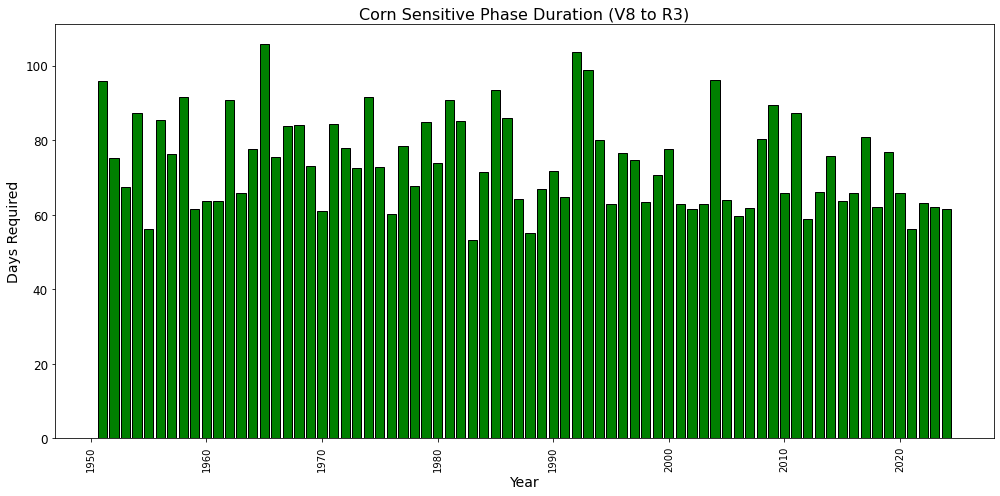

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data (make sure this file exists)
df = pd.read_csv("AllCounties_CornGrowthStages_1951_2022_withBeckerRef_combined.csv")

# Filter for VT and R1 stages
df_filtered = df[df["Stage"].isin(["V8", "R3"])]

# Pivot to get DAP values side-by-side
dap_pivot = df_filtered.pivot_table(
    index=["Year", "County"],
    columns="Stage",
    values="DAP Reached"
).reset_index()

# Compute duration from VT to R1
dap_pivot["Sensitive Phase Duration (days)"] = dap_pivot["R3"] - dap_pivot["V8"]

# Average duration per year
avg_duration_by_year = dap_pivot.groupby("Year")["Sensitive Phase Duration (days)"].mean().reset_index()

# Plot
plt.figure(figsize=(14, 7))
plt.bar(
    avg_duration_by_year["Year"],
    avg_duration_by_year["Sensitive Phase Duration (days)"],
    color='green',
    edgecolor='black'
)

plt.title("Corn Sensitive Phase Duration (V8 to R3)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Days Required", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.grid(False)
plt.show()


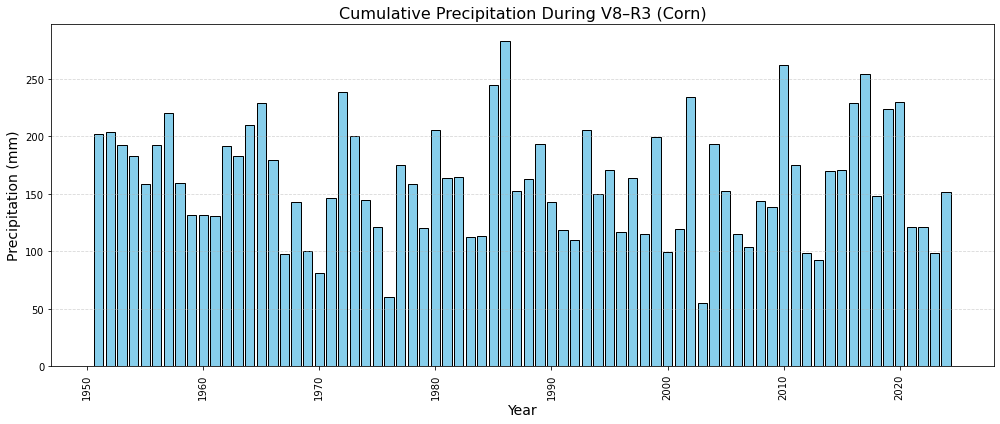

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load growth stage and weather data
df = pd.read_csv("AllCounties_CornGrowthStages_1951_2022_withBeckerRef_combined.csv")
noaa = pd.read_csv("Combined_NOAA_nClimGrid_AllCounties.csv")

# Preprocessing
df["Planting Date"] = pd.to_datetime(df["Planting Date"], errors="coerce")
df["Stage Date"] = df["Planting Date"] + pd.to_timedelta(df["DAP Reached"], unit="D")
noaa["time"] = pd.to_datetime(noaa["time"])


# -------------------------------
# Get V8 and R3 stage dates
stage_date_df = df[df["Stage"].isin(["V8", "R3"])]
date_pivot = stage_date_df.pivot_table(
    index=["County", "Year"],
    columns="Stage",
    values="Stage Date"
).reset_index().dropna()

# Compute cumulative precipitation for each County-Year
precip_data = []
for _, row in date_pivot.iterrows():
    county = row["County"]
    year = row["Year"]
    start = row["V8"]
    end = row["R3"]

    mask = (
        (noaa["County"] == county) &
        (noaa["time"] >= start) &
        (noaa["time"] <= end)
    )
    total_precip = noaa.loc[mask, "prcp"].sum()

    precip_data.append({
        "County": county,
        "Year": year,
        "Cumulative Precipitation (mm)": total_precip
    })

precip_df = pd.DataFrame(precip_data)
avg_precip_by_year = precip_df.groupby("Year")["Cumulative Precipitation (mm)"].mean().reset_index()



# Plot Precipitation
plt.figure(figsize=(14, 6))
plt.bar(
    avg_precip_by_year["Year"],
    avg_precip_by_year["Cumulative Precipitation (mm)"],
    color='skyblue',
    edgecolor='black'
)
plt.title("Cumulative Precipitation During V8–R3 (Corn)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Precipitation (mm)", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


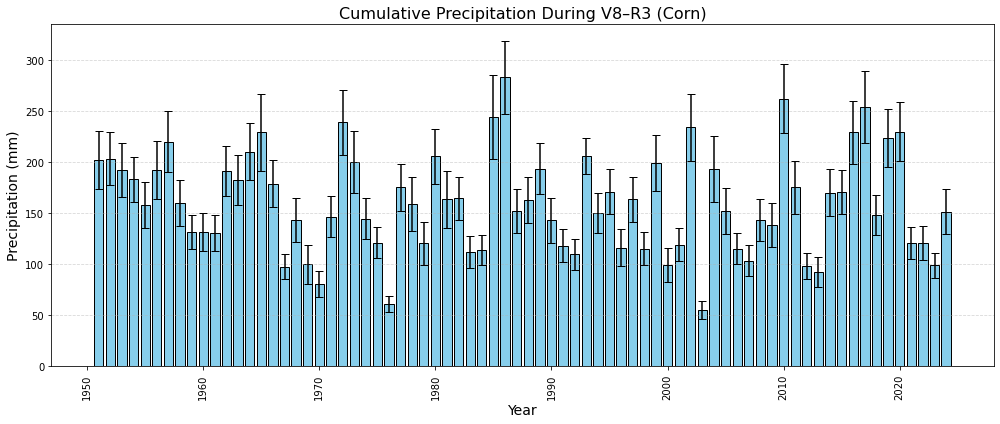

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your data as before
df = pd.read_csv("AllCounties_CornGrowthStages_1951_2022_withBeckerRef_combined.csv")
noaa = pd.read_csv("Combined_NOAA_nClimGrid_AllCounties.csv")

# Preprocessing
df["Planting Date"] = pd.to_datetime(df["Planting Date"], errors="coerce")
df["Stage Date"] = df["Planting Date"] + pd.to_timedelta(df["DAP Reached"], unit="D")
noaa["time"] = pd.to_datetime(noaa["time"])

# Filter for V8 and R3 stages
stage_date_df = df[df["Stage"].isin(["V8", "R3"])]
date_pivot = stage_date_df.pivot_table(
    index=["County", "Year"],
    columns="Stage",
    values="Stage Date"
).reset_index().dropna()

# Compute cumulative precipitation
precip_data = []
for _, row in date_pivot.iterrows():
    county = row["County"]
    year = row["Year"]
    start = row["V8"]
    end = row["R3"]
    
    mask = (
        (noaa["County"] == county) &
        (noaa["time"] >= start) &
        (noaa["time"] <= end)
    )
    total_precip = noaa.loc[mask, "prcp"].sum()

    precip_data.append({
        "County": county,
        "Year": year,
        "Cumulative Precipitation (mm)": total_precip
    })

precip_df = pd.DataFrame(precip_data)

# Calculate mean and SEM
summary = precip_df.groupby("Year")["Cumulative Precipitation (mm)"].agg(['mean', 'sem']).reset_index()

# Plot with error bars
plt.figure(figsize=(14, 6))
plt.bar(
    summary["Year"],
    summary["mean"],
    yerr=summary["sem"],
    capsize=4,
    color='skyblue',
    edgecolor='black'
)

plt.title("Cumulative Precipitation During V8–R3 (Corn)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Precipitation (mm)", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


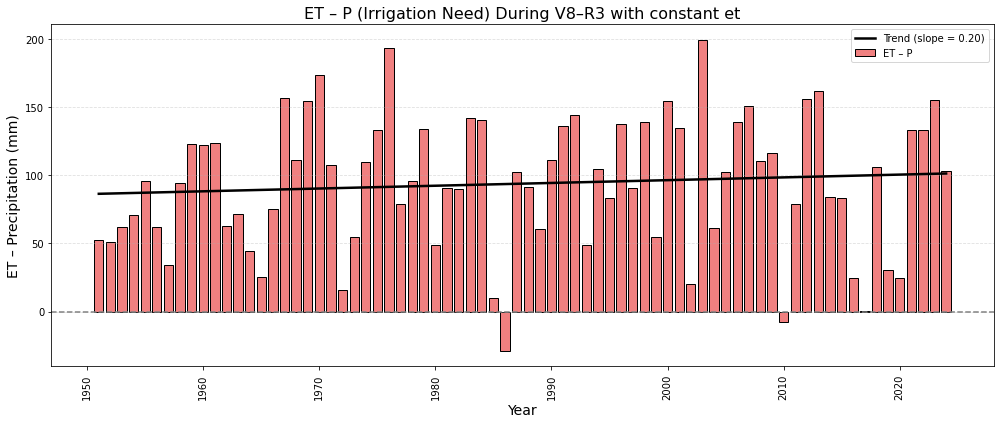

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Load data
df = pd.read_csv("AllCounties_CornGrowthStages_1951_2022_withBeckerRef_combined.csv")
noaa = pd.read_csv("Combined_NOAA_nClimGrid_AllCounties.csv")

# Preprocess
df["Planting Date"] = pd.to_datetime(df["Planting Date"], errors="coerce")
df["Stage Date"] = df["Planting Date"] + pd.to_timedelta(df["DAP Reached"], unit="D")
noaa["time"] = pd.to_datetime(noaa["time"])

# Filter for V8 and R3 stages
stage_df = df[df["Stage"].isin(["V8", "R3"])]
pivoted = stage_df.pivot_table(index=["County", "Year"], columns="Stage", values="Stage Date").reset_index().dropna()

# Compute cumulative precipitation
records = []
for _, row in pivoted.iterrows():
    mask = (
        (noaa["County"] == row["County"]) &
        (noaa["time"] >= row["V8"]) &
        (noaa["time"] <= row["R3"])
    )
    total_precip = noaa.loc[mask, "prcp"].sum()
    records.append({
        "County": row["County"],
        "Year": row["Year"],
        "Cumulative Precipitation (mm)": total_precip
    })

precip_df = pd.DataFrame(records)

# Aggregate by year
yearly = precip_df.groupby("Year")["Cumulative Precipitation (mm)"].agg(['mean', 'sem']).reset_index()

# Constants: Iowa and Minnesota ET (in mm)
et_iowa = 265.15
et_minnesota = 243.84
et_avg = (et_iowa + et_minnesota) / 2

# Compute ET - P
yearly["ET_minus_P"] = et_avg - yearly["mean"]

# Fit linear trend
slope, intercept, r_value, p_value, _ = linregress(yearly["Year"], yearly["ET_minus_P"])
trend_line = intercept + slope * yearly["Year"]

# Plot
plt.figure(figsize=(14, 6))
plt.bar(yearly["Year"], yearly["ET_minus_P"], color='lightcoral', edgecolor='black', label="ET – P")
plt.plot(yearly["Year"], trend_line, color='black', linewidth=2.5, label=f"Trend (slope = {slope:.2f})")
plt.axhline(0, color='gray', linestyle='--')

plt.title("ET – P (Irrigation Need) During V8–R3 with constant et", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("ET – Precipitation (mm)", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


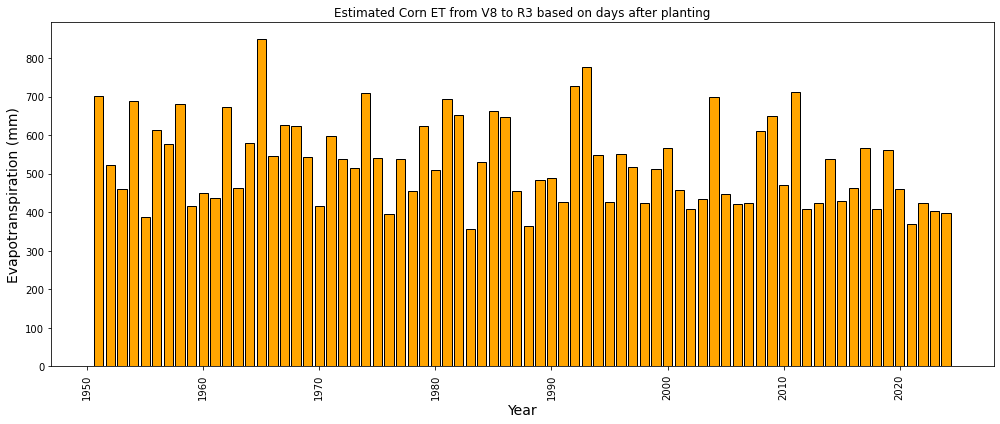

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned data
df = pd.read_csv("AllCounties_CornGrowthStages_1951_2022_withBeckerRef_combined.csv")

# Convert planting date
df["Planting Date"] = pd.to_datetime(df["Planting Date"], errors="coerce")
df["Stage Date"] = df["Planting Date"] + pd.to_timedelta(df["DAP Reached"], unit="D")

# Filter for V8, R2, R3
df_stages = df[df["Stage"].isin(["V8", "R2", "R3"])]
pivot_df = df_stages.pivot_table(index=["County", "Year"], columns="Stage", values="DAP Reached").dropna().reset_index()

# Compute days
pivot_df["V8_to_R2_days"] = pivot_df["R2"] - pivot_df["V8"]
pivot_df["R2_to_R3_days"] = pivot_df["R3"] - pivot_df["R2"]

# Apply ET rate
pivot_df["ET_inches"] = (pivot_df["V8_to_R2_days"] * 0.14) + (pivot_df["R2_to_R3_days"] * 0.47)
pivot_df["ET_mm"] = pivot_df["ET_inches"] * 25.4

# Average ET per year
et_yearly = pivot_df.groupby("Year")["ET_mm"].mean().reset_index()

# Plot
plt.figure(figsize=(14, 6))
plt.bar(et_yearly["Year"], et_yearly["ET_mm"], color="orange", edgecolor="black")
plt.title("Estimated Corn ET from V8 to R3 based on days after planting")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Evapotranspiration (mm)", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


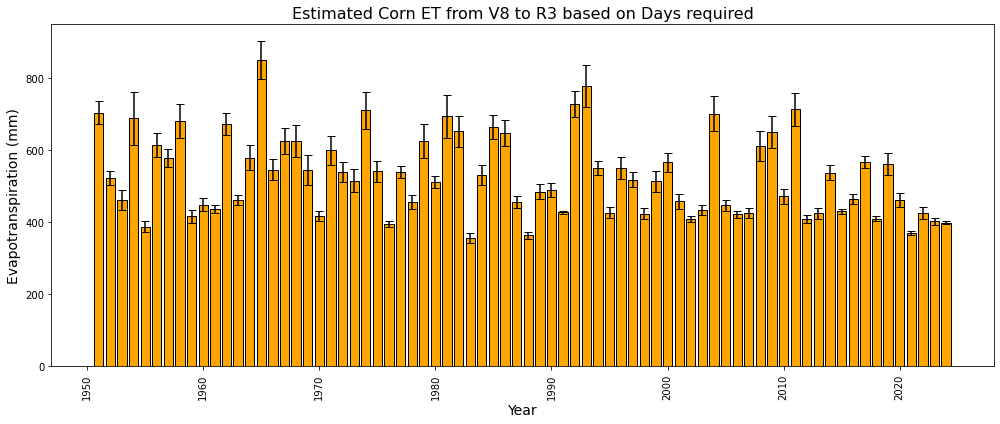

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned data
df = pd.read_csv("AllCounties_CornGrowthStages_1951_2022_withBeckerRef_combined.csv")

# Convert planting date
df["Planting Date"] = pd.to_datetime(df["Planting Date"], errors="coerce")
df["Stage Date"] = df["Planting Date"] + pd.to_timedelta(df["DAP Reached"], unit="D")

# Filter for V8, R2, R3
df_stages = df[df["Stage"].isin(["V8", "R2", "R3"])]
pivot_df = df_stages.pivot_table(index=["County", "Year"], columns="Stage", values="DAP Reached").dropna().reset_index()

# Compute days between stages
pivot_df["V8_to_R2_days"] = pivot_df["R2"] - pivot_df["V8"]
pivot_df["R2_to_R3_days"] = pivot_df["R3"] - pivot_df["R2"]

# Apply ET rate (inches), then convert to mm
pivot_df["ET_inches"] = (pivot_df["V8_to_R2_days"] * 0.14) + (pivot_df["R2_to_R3_days"] * 0.47)
pivot_df["ET_mm"] = pivot_df["ET_inches"] * 25.4

# Compute mean and standard error by year
et_summary = pivot_df.groupby("Year")["ET_mm"].agg(['mean', 'sem']).reset_index()

# Plot with error bars
plt.figure(figsize=(14, 6))
plt.bar(et_summary["Year"], et_summary["mean"], yerr=et_summary["sem"], capsize=4,
        color="orange", edgecolor="black")
plt.title("Estimated Corn ET from V8 to R3 based on Days required", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Evapotranspiration (mm)", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


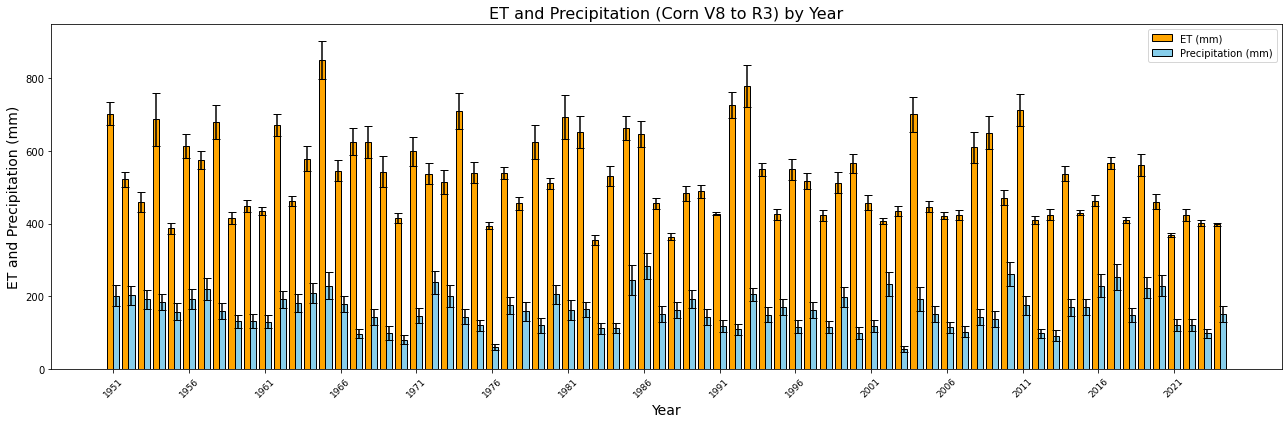

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Load data ---
df = pd.read_csv("AllCounties_CornGrowthStages_1951_2022_withBeckerRef_combined.csv")
noaa = pd.read_csv("Combined_NOAA_nClimGrid_AllCounties.csv")

# --- Preprocess ---
df["Planting Date"] = pd.to_datetime(df["Planting Date"], errors="coerce")
df["Stage Date"] = df["Planting Date"] + pd.to_timedelta(df["DAP Reached"], unit="D")
noaa["time"] = pd.to_datetime(noaa["time"])

# --- ET CALCULATION ---
df_stages = df[df["Stage"].isin(["V8", "R2", "R3"])]
pivot_df = df_stages.pivot_table(index=["County", "Year"], columns="Stage", values="DAP Reached").dropna().reset_index()
pivot_df["V8_to_R2_days"] = pivot_df["R2"] - pivot_df["V8"]
pivot_df["R2_to_R3_days"] = pivot_df["R3"] - pivot_df["R2"]
pivot_df["ET_inches"] = (pivot_df["V8_to_R2_days"] * 0.14) + (pivot_df["R2_to_R3_days"] * 0.47)
pivot_df["ET_mm"] = pivot_df["ET_inches"] * 25.4
et_summary = pivot_df.groupby("Year")["ET_mm"].agg(['mean', 'sem']).reset_index()
et_summary.rename(columns={"mean": "ET_mm", "sem": "ET_SE"}, inplace=True)

# --- PRECIPITATION CALCULATION ---
stage_date_df = df[df["Stage"].isin(["V8", "R3"])]
date_pivot = stage_date_df.pivot_table(index=["County", "Year"], columns="Stage", values="Stage Date").reset_index().dropna()

precip_data = []
for _, row in date_pivot.iterrows():
    county = row["County"]
    year = row["Year"]
    start = row["V8"]
    end = row["R3"]
    mask = (noaa["County"] == county) & (noaa["time"] >= start) & (noaa["time"] <= end)
    total_precip = noaa.loc[mask, "prcp"].sum()
    precip_data.append({"County": county, "Year": year, "Precip_mm": total_precip})

precip_df = pd.DataFrame(precip_data)
precip_summary = precip_df.groupby("Year")["Precip_mm"].agg(['mean', 'sem']).reset_index()
precip_summary.rename(columns={"mean": "Precip_mm", "sem": "Precip_SE"}, inplace=True)

# --- MERGE BOTH ---
combined = pd.merge(et_summary, precip_summary, on="Year")

# Keep the rest of your code the same until the plotting section...

# --- PLOT (Improved) ---
x = np.arange(len(combined["Year"]))
width = 0.4

plt.figure(figsize=(18, 6))  # Slightly wider
plt.bar(x - width/2, combined["ET_mm"], yerr=combined["ET_SE"], capsize=4,
        width=width, label="ET (mm)", color='orange', edgecolor='black')
plt.bar(x + width/2, combined["Precip_mm"], yerr=combined["Precip_SE"], capsize=4,
        width=width, label="Precipitation (mm)", color='skyblue', edgecolor='black')

# Show every 5th year to reduce clutter
years = combined["Year"].tolist()
tick_interval = 5
plt.xticks(
    ticks=x[::tick_interval],
    labels=years[::tick_interval],
    rotation=45,
    fontsize=9
)

plt.title("ET and Precipitation (Corn V8 to R3) by Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("ET and Precipitation (mm)", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


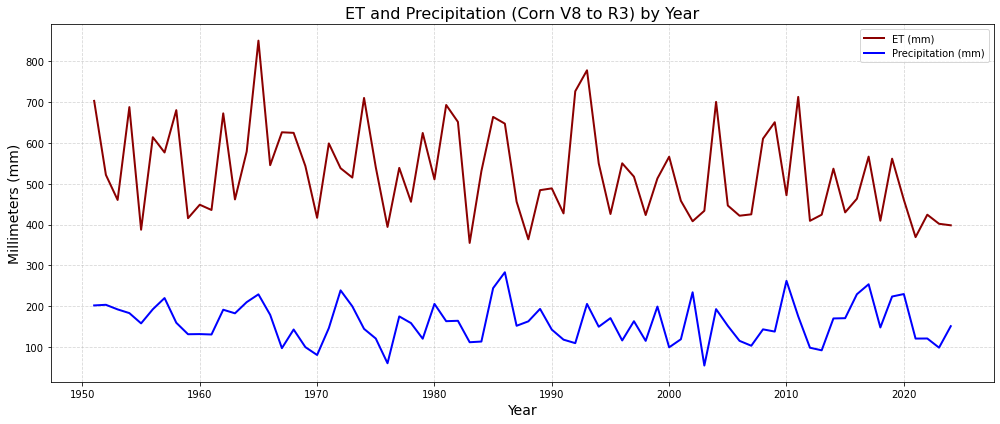

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess data
df = pd.read_csv("AllCounties_CornGrowthStages_1951_2022_withBeckerRef_combined.csv")
noaa = pd.read_csv("Combined_NOAA_nClimGrid_AllCounties.csv")

df["Planting Date"] = pd.to_datetime(df["Planting Date"], errors="coerce")
df["Stage Date"] = df["Planting Date"] + pd.to_timedelta(df["DAP Reached"], unit="D")
noaa["time"] = pd.to_datetime(noaa["time"])

# ET calculation
df_stages = df[df["Stage"].isin(["V8", "R2", "R3"])]
pivot_df = df_stages.pivot_table(index=["County", "Year"], columns="Stage", values="DAP Reached").dropna().reset_index()
pivot_df["V8_to_R2_days"] = pivot_df["R2"] - pivot_df["V8"]
pivot_df["R2_to_R3_days"] = pivot_df["R3"] - pivot_df["R2"]
pivot_df["ET_inches"] = (pivot_df["V8_to_R2_days"] * 0.14) + (pivot_df["R2_to_R3_days"] * 0.47)
pivot_df["ET_mm"] = pivot_df["ET_inches"] * 25.4
et_summary = pivot_df.groupby("Year")["ET_mm"].mean().reset_index()

# Precipitation calculation
stage_date_df = df[df["Stage"].isin(["V8", "R3"])]
date_pivot = stage_date_df.pivot_table(index=["County", "Year"], columns="Stage", values="Stage Date").reset_index().dropna()
precip_data = []
for _, row in date_pivot.iterrows():
    county = row["County"]
    year = row["Year"]
    start = row["V8"]
    end = row["R3"]
    mask = (noaa["County"] == county) & (noaa["time"] >= start) & (noaa["time"] <= end)
    total_precip = noaa.loc[mask, "prcp"].sum()
    precip_data.append({"County": county, "Year": year, "Precip_mm": total_precip})

precip_df = pd.DataFrame(precip_data)
precip_summary = precip_df.groupby("Year")["Precip_mm"].mean().reset_index()

# Merge both
combined = pd.merge(et_summary, precip_summary, on="Year")

# Line plot
plt.figure(figsize=(14, 6))
plt.plot(combined["Year"], combined["ET_mm"], label="ET (mm)", color='darkred', linewidth=2)
plt.plot(combined["Year"], combined["Precip_mm"], label="Precipitation (mm)", color='blue', linewidth=2)

plt.title("ET and Precipitation (Corn V8 to R3) by Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Millimeters (mm)", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


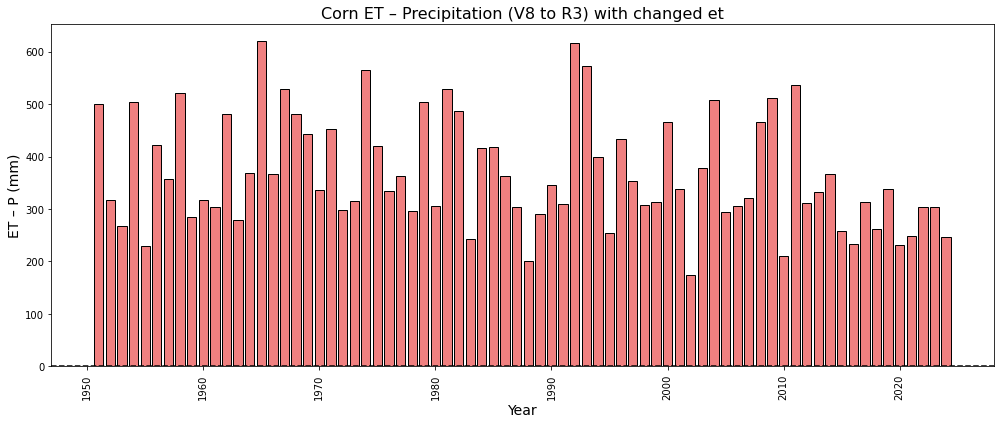

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Load growth stage and weather data
df = pd.read_csv("AllCounties_CornGrowthStages_1951_2022_withBeckerRef_combined.csv")
noaa = pd.read_csv("Combined_NOAA_nClimGrid_AllCounties.csv")

# Preprocessing
df["Planting Date"] = pd.to_datetime(df["Planting Date"], errors="coerce")
df["Stage Date"] = df["Planting Date"] + pd.to_timedelta(df["DAP Reached"], unit="D")
noaa["time"] = pd.to_datetime(noaa["time"])

# Filter for V8, R2, R3 stages
df_stages = df[df["Stage"].isin(["V8", "R2", "R3"])]
pivot_df = df_stages.pivot_table(index=["County", "Year"], columns="Stage", values="DAP Reached").dropna().reset_index()

# ET calculation
pivot_df["V8_to_R2_days"] = pivot_df["R2"] - pivot_df["V8"]
pivot_df["R2_to_R3_days"] = pivot_df["R3"] - pivot_df["R2"]
pivot_df["ET_inches"] = (pivot_df["V8_to_R2_days"] * 0.14) + (pivot_df["R2_to_R3_days"] * 0.47)
pivot_df["ET_mm"] = pivot_df["ET_inches"] * 25.4

# Average ET by year
et_by_year = pivot_df.groupby("Year")["ET_mm"].mean().reset_index()

# V8 and R3 stage dates for each County-Year
date_df = df[df["Stage"].isin(["V8", "R3"])]
stage_dates = date_df.pivot_table(index=["County", "Year"], columns="Stage", values="Stage Date").reset_index().dropna()

# Calculate cumulative precipitation for V8–R3 window
precip_list = []
for _, row in stage_dates.iterrows():
    mask = (
        (noaa["County"] == row["County"]) &
        (noaa["time"] >= row["V8"]) &
        (noaa["time"] <= row["R3"])
    )
    total_precip = noaa.loc[mask, "prcp"].sum()
    precip_list.append({
        "County": row["County"],
        "Year": row["Year"],
        "Precip_mm": total_precip
    })

precip_df = pd.DataFrame(precip_list)

# Average Precipitation by Year
precip_by_year = precip_df.groupby("Year")["Precip_mm"].mean().reset_index()

# Merge ET and P
etp_df = pd.merge(et_by_year, precip_by_year, on="Year")
etp_df["ET_minus_P"] = etp_df["ET_mm"] - etp_df["Precip_mm"]

# Plot ET - P
plt.figure(figsize=(14, 6))
plt.bar(etp_df["Year"], etp_df["ET_minus_P"], color="lightcoral", edgecolor="black")
plt.axhline(0, color='black', linestyle='--')
plt.title("Corn ET – Precipitation (V8 to R3) with changed et", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("ET – P (mm)", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


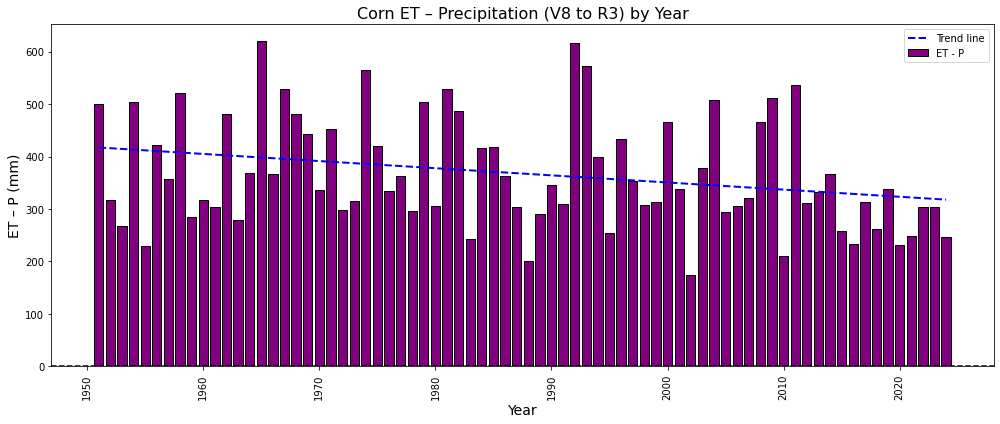

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load growth stage and weather data
df = pd.read_csv("AllCounties_CornGrowthStages_1951_2022_withBeckerRef_combined.csv")
noaa = pd.read_csv("Combined_NOAA_nClimGrid_AllCounties.csv")

# Preprocessing
df["Planting Date"] = pd.to_datetime(df["Planting Date"], errors="coerce")
df["Stage Date"] = df["Planting Date"] + pd.to_timedelta(df["DAP Reached"], unit="D")
noaa["time"] = pd.to_datetime(noaa["time"])

# Filter for V8, R2, R3 stages
df_stages = df[df["Stage"].isin(["V8", "R2", "R3"])]
pivot_df = df_stages.pivot_table(index=["County", "Year"], columns="Stage", values="DAP Reached").dropna().reset_index()

# ET calculation
pivot_df["V8_to_R2_days"] = pivot_df["R2"] - pivot_df["V8"]
pivot_df["R2_to_R3_days"] = pivot_df["R3"] - pivot_df["R2"]
pivot_df["ET_inches"] = (pivot_df["V8_to_R2_days"] * 0.14) + (pivot_df["R2_to_R3_days"] * 0.47)
pivot_df["ET_mm"] = pivot_df["ET_inches"] * 25.4

# Average ET by year
et_by_year = pivot_df.groupby("Year")["ET_mm"].mean().reset_index()

# V8 and R3 stage dates for each County-Year
date_df = df[df["Stage"].isin(["V8", "R3"])]
stage_dates = date_df.pivot_table(index=["County", "Year"], columns="Stage", values="Stage Date").reset_index().dropna()

# Calculate cumulative precipitation for V8–R3 window
precip_list = []
for _, row in stage_dates.iterrows():
    mask = (
        (noaa["County"] == row["County"]) &
        (noaa["time"] >= row["V8"]) &
        (noaa["time"] <= row["R3"])
    )
    total_precip = noaa.loc[mask, "prcp"].sum()
    precip_list.append({
        "County": row["County"],
        "Year": row["Year"],
        "Precip_mm": total_precip
    })

precip_df = pd.DataFrame(precip_list)

# Average Precipitation by Year
precip_by_year = precip_df.groupby("Year")["Precip_mm"].mean().reset_index()

# Merge ET and P
etp_df = pd.merge(et_by_year, precip_by_year, on="Year")
etp_df["ET_minus_P"] = etp_df["ET_mm"] - etp_df["Precip_mm"]

# Fit trend line
x = etp_df["Year"]
y = etp_df["ET_minus_P"]
slope, intercept = np.polyfit(x, y, 1)
trend = slope * x + intercept

# Plot ET - P with trend line
plt.figure(figsize=(14, 6))
plt.bar(x, y, color="purple", edgecolor="black", label="ET - P")
plt.plot(x, trend, color="blue", linestyle="--", linewidth=2, label="Trend line")
plt.axhline(0, color='black', linestyle='--')

plt.title("Corn ET – Precipitation (V8 to R3) by Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("ET – P (mm)", fontsize=14)
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


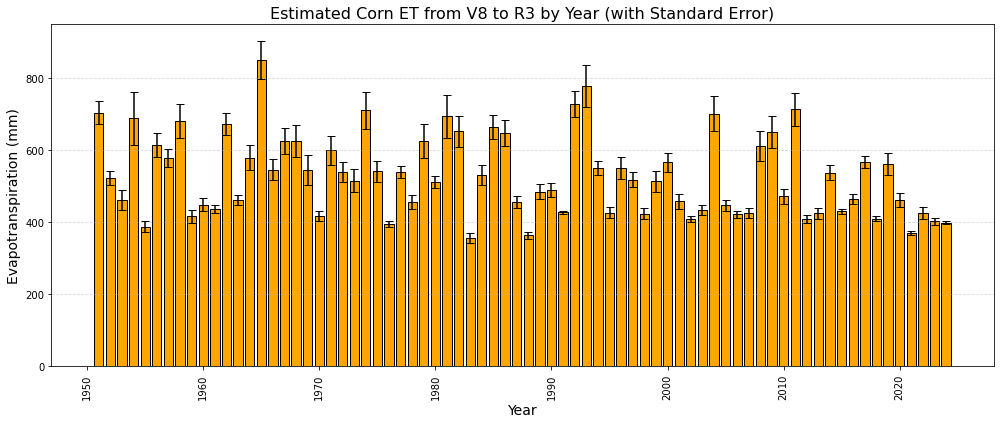

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned data
df = pd.read_csv("AllCounties_CornGrowthStages_1951_2022_withBeckerRef_combined.csv")

# Convert planting date
df["Planting Date"] = pd.to_datetime(df["Planting Date"], errors="coerce")
df["Stage Date"] = df["Planting Date"] + pd.to_timedelta(df["DAP Reached"], unit="D")

# Filter for V8, R2, R3
df_stages = df[df["Stage"].isin(["V8", "R2", "R3"])]
pivot_df = df_stages.pivot_table(index=["County", "Year"], columns="Stage", values="DAP Reached").dropna().reset_index()

# Compute days between stages
pivot_df["V8_to_R2_days"] = pivot_df["R2"] - pivot_df["V8"]
pivot_df["R2_to_R3_days"] = pivot_df["R3"] - pivot_df["R2"]

# Apply ET rate (inches), then convert to mm
pivot_df["ET_inches"] = (pivot_df["V8_to_R2_days"] * 0.14) + (pivot_df["R2_to_R3_days"] * 0.47)
pivot_df["ET_mm"] = pivot_df["ET_inches"] * 25.4

# Compute mean and standard error by year
et_summary = pivot_df.groupby("Year")["ET_mm"].agg(['mean', 'sem']).reset_index()

# Plot with error bars
plt.figure(figsize=(14, 6))
plt.bar(et_summary["Year"], et_summary["mean"], yerr=et_summary["sem"], capsize=4,
        color="orange", edgecolor="black")

plt.title("Estimated Corn ET from V8 to R3 by Year (with Standard Error)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Evapotranspiration (mm)", fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


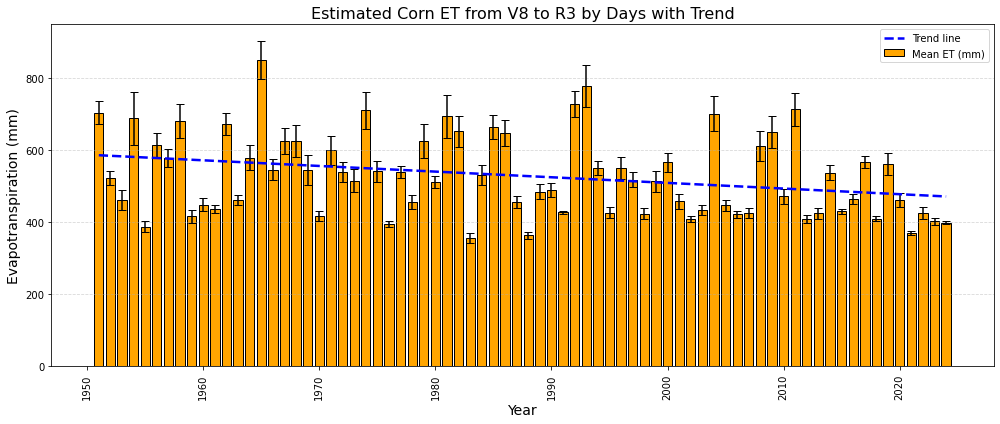

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load cleaned data
df = pd.read_csv("AllCounties_CornGrowthStages_1951_2022_withBeckerRef_combined.csv")

# Convert planting date
df["Planting Date"] = pd.to_datetime(df["Planting Date"], errors="coerce")
df["Stage Date"] = df["Planting Date"] + pd.to_timedelta(df["DAP Reached"], unit="D")

# Filter for V8, R2, R3
df_stages = df[df["Stage"].isin(["V8", "R2", "R3"])]
pivot_df = df_stages.pivot_table(index=["County", "Year"], columns="Stage", values="DAP Reached").dropna().reset_index()

# Compute days between stages
pivot_df["V8_to_R2_days"] = pivot_df["R2"] - pivot_df["V8"]
pivot_df["R2_to_R3_days"] = pivot_df["R3"] - pivot_df["R2"]

# Apply ET rate (inches), then convert to mm
pivot_df["ET_inches"] = (pivot_df["V8_to_R2_days"] * 0.14) + (pivot_df["R2_to_R3_days"] * 0.47)
pivot_df["ET_mm"] = pivot_df["ET_inches"] * 25.4

# Compute mean and standard error by year
et_summary = pivot_df.groupby("Year")["ET_mm"].agg(['mean', 'sem']).reset_index()

# Prepare trend line
x = et_summary["Year"]
y = et_summary["mean"]
slope, intercept = np.polyfit(x, y, 1)
trend = slope * x + intercept

# Plot
plt.figure(figsize=(14, 6))
plt.bar(x, y, yerr=et_summary["sem"], capsize=4, color="orange", edgecolor="black", label="Mean ET (mm)")
plt.plot(x, trend, color="blue", linewidth=2.5, linestyle="--", label="Trend line")

plt.title("Estimated Corn ET from V8 to R3 by Days with Trend", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Evapotranspiration (mm)", fontsize=14)
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


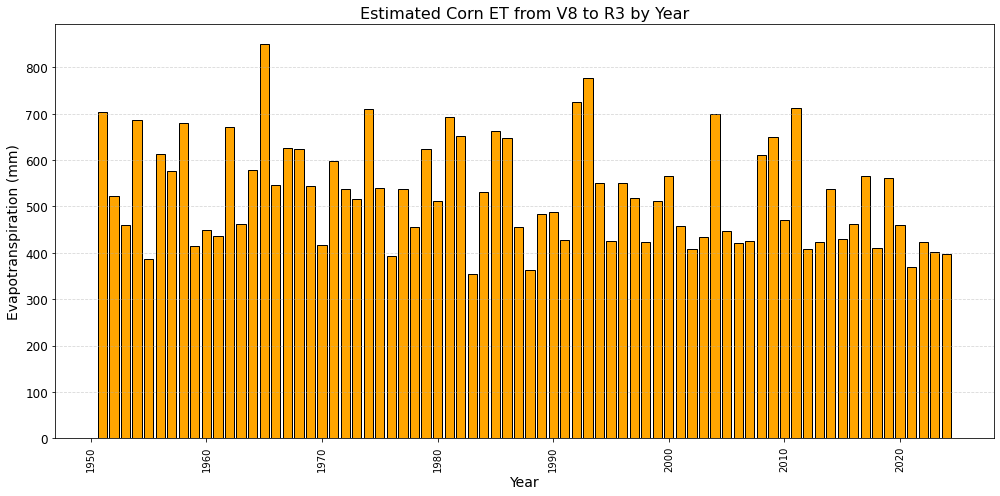

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("AllCounties_CornGrowthStages_1951_2022_withBeckerRef_combined.csv")

# Convert planting date and compute stage dates
df["Planting Date"] = pd.to_datetime(df["Planting Date"], errors="coerce")
df["Stage Date"] = df["Planting Date"] + pd.to_timedelta(df["DAP Reached"], unit="D")

# Filter only for V8, R2, R3 stages
df_filtered = df[df["Stage"].isin(["V8", "R2", "R3"])]

# Pivot to get DAPs for each stage side by side
dap_pivot = df_filtered.pivot_table(
    index=["Year", "County"],
    columns="Stage",
    values="DAP Reached"
).reset_index()

# Remove rows with missing data
dap_pivot = dap_pivot.dropna()

# Calculate duration between stages
dap_pivot["V8_to_R2_days"] = dap_pivot["R2"] - dap_pivot["V8"]
dap_pivot["R2_to_R3_days"] = dap_pivot["R3"] - dap_pivot["R2"]

# Apply ET rates (inches/day)
et_v8_r2_in = dap_pivot["V8_to_R2_days"] * 0.14
et_r2_r3_in = dap_pivot["R2_to_R3_days"] * 0.47

# Total ET in inches and convert to mm (1 inch = 25.4 mm)
dap_pivot["ET_inches"] = et_v8_r2_in + et_r2_r3_in
dap_pivot["ET_mm"] = dap_pivot["ET_inches"] * 25.4

# Average ET per year
et_by_year = dap_pivot.groupby("Year")["ET_mm"].mean().reset_index()

# Plot ET by year
plt.figure(figsize=(14, 7))
plt.bar(
    et_by_year["Year"],
    et_by_year["ET_mm"],
    color='orange',
    edgecolor='black'
)
plt.title("Estimated Corn ET from V8 to R3 by Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Evapotranspiration (mm)", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


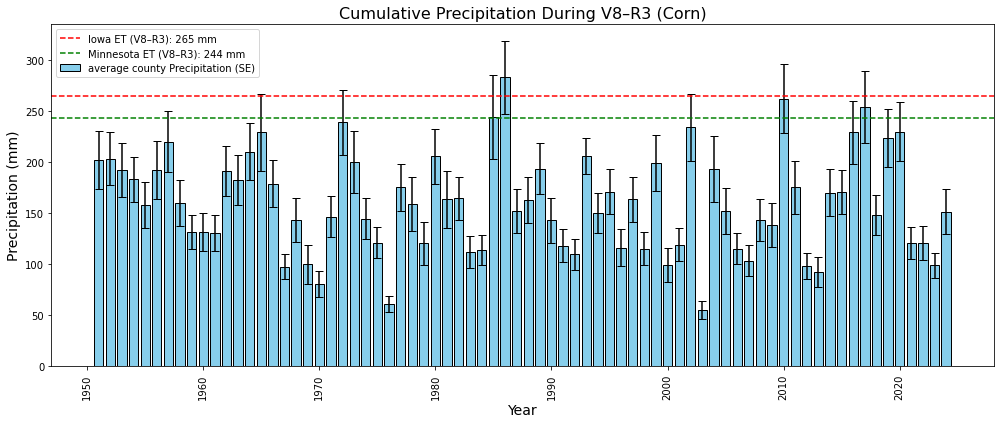

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Iowa and Minnesota ET benchmark (in mm)
et_iowa_mm = 265.15         # V8–R3 ET from Iowa
et_minnesota_mm = 243.84    # V8–R3 ET from Minnesota

# Load data
df = pd.read_csv("AllCounties_CornGrowthStages_1951_2022_withBeckerRef_combined.csv")
noaa = pd.read_csv("Combined_NOAA_nClimGrid_AllCounties.csv")

# Preprocessing
df["Planting Date"] = pd.to_datetime(df["Planting Date"], errors="coerce")
df["Stage Date"] = df["Planting Date"] + pd.to_timedelta(df["DAP Reached"], unit="D")
noaa["time"] = pd.to_datetime(noaa["time"])

# Filter for V8 and R3 stages
stage_date_df = df[df["Stage"].isin(["V8", "R3"])]
date_pivot = stage_date_df.pivot_table(
    index=["County", "Year"],
    columns="Stage",
    values="Stage Date"
).reset_index().dropna()

# Compute cumulative precipitation
precip_data = []
for _, row in date_pivot.iterrows():
    county = row["County"]
    year = row["Year"]
    start = row["V8"]
    end = row["R3"]

    mask = (
        (noaa["County"] == county) &
        (noaa["time"] >= start) &
        (noaa["time"] <= end)
    )
    total_precip = noaa.loc[mask, "prcp"].sum()

    precip_data.append({
        "County": county,
        "Year": year,
        "Cumulative Precipitation (mm)": total_precip
    })

precip_df = pd.DataFrame(precip_data)

# Compute mean and SEM
summary = precip_df.groupby("Year")["Cumulative Precipitation (mm)"].agg(['mean', 'sem']).reset_index()

# Plot with SEM and ET reference lines
plt.figure(figsize=(14, 6))
plt.bar(
    summary["Year"],
    summary["mean"],
    yerr=summary["sem"],
    capsize=4,
    color='skyblue',
    edgecolor='black',
    label='average county Precipitation (SE)'
)

# Add ET lines
plt.axhline(y=et_iowa_mm, color='red', linestyle='--', label=f'Iowa ET (V8–R3): {et_iowa_mm:.0f} mm')
plt.axhline(y=et_minnesota_mm, color='green', linestyle='--', label=f'Minnesota ET (V8–R3): {et_minnesota_mm:.0f} mm')

# Final plot styling
plt.title("Cumulative Precipitation During V8–R3 (Corn)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Precipitation (mm)", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()


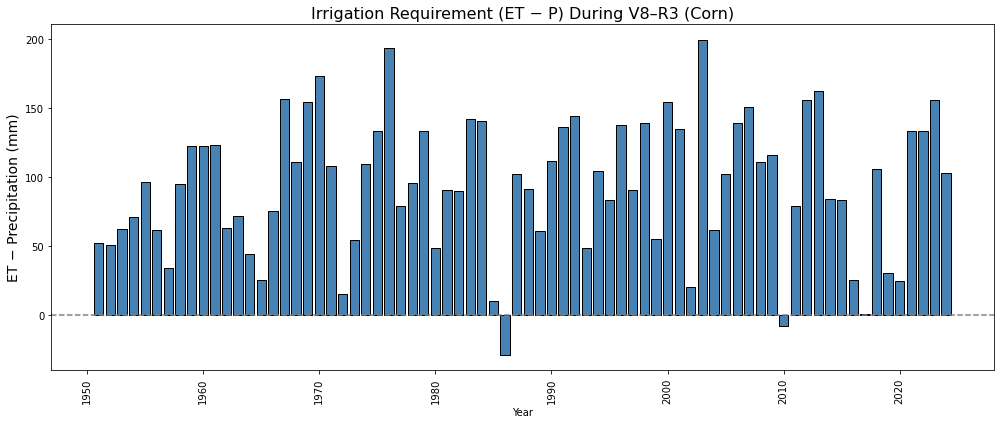

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Average ET value from Iowa and Minnesota (in mm)
avg_et_mm = (265.15 + 243.84) / 2  # = 254.495 mm

# Load growth stage and precipitation data
df = pd.read_csv("AllCounties_CornGrowthStages_1951_2022_withBeckerRef_combined.csv")
noaa = pd.read_csv("Combined_NOAA_nClimGrid_AllCounties.csv")

# Preprocess dates
df["Planting Date"] = pd.to_datetime(df["Planting Date"], errors="coerce")
df["Stage Date"] = df["Planting Date"] + pd.to_timedelta(df["DAP Reached"], unit="D")
noaa["time"] = pd.to_datetime(noaa["time"])

# Get V8 and R3 stage dates
stage_df = df[df["Stage"].isin(["V8", "R3"])]
pivot = stage_df.pivot_table(index=["County", "Year"], columns="Stage", values="Stage Date").reset_index().dropna()

# Calculate cumulative precipitation (P) between V8 and R3
records = []
for _, row in pivot.iterrows():
    mask = (
        (noaa["County"] == row["County"]) &
        (noaa["time"] >= row["V8"]) &
        (noaa["time"] <= row["R3"])
    )
    total_precip = noaa.loc[mask, "prcp"].sum()
    records.append({"Year": row["Year"], "Precip (mm)": total_precip})

# Average precipitation by year
p_df = pd.DataFrame(records)
p_avg = p_df.groupby("Year")["Precip (mm)"].mean().reset_index()

# Compute ET - P using average ET
p_avg["ET - P (mm)"] = avg_et_mm - p_avg["Precip (mm)"]

# Plot
plt.figure(figsize=(14, 6))
plt.bar(p_avg["Year"], p_avg["ET - P (mm)"], color="steelblue", edgecolor="black")

plt.axhline(0, color='gray', linestyle='--')
plt.title("Irrigation Requirement (ET − P) During V8–R3 (Corn)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("ET − Precipitation (mm)", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import os

# === Step 0: Setup ===
county_names = [
    "Wadena", "Cass", "Crow_Wing", "Todd", "Morrison", "Douglas",
    "Otter_Tail", "Pope", "Stearns", "Sherburne", "Benton",
    "Becker", "Hubbard", "Kandiyohi"
]
planting_date = pd.Timestamp("2024-05-01")

# Output folder
output_folder = "Corn_2024_Growth_Stages_Diff"
os.makedirs(output_folder, exist_ok=True)

# === Step 1: Load and process Becker 2024 growth stages ===
becker_2024 = pd.read_csv("Becker 2024 corn Growth staging.csv")
becker_2024.columns = becker_2024.columns.str.strip()
becker_2024["Date"] = pd.to_datetime(becker_2024["Date"] + "-2024", format="%d-%b-%Y", errors="coerce")

ordered_stages = [
    'VE', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
    'R1', 'R2', 'R3', 'R4', 'R5', 'R6']

# Mode-based thresholds
becker_mode = becker_2024.groupby("Date")["Growth Stage"].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
).reset_index()

becker_mode_with_agdd = pd.merge(becker_mode, becker_2024, on=["Date", "Growth Stage"], how="left")
becker_mode_with_agdd["Becker DAP"] = (becker_mode_with_agdd["Date"] - planting_date).dt.days
becker_thresholds = becker_mode_with_agdd.drop_duplicates("Growth Stage")[["Growth Stage", "AGDD", "Becker DAP"]]
becker_thresholds["Growth Stage"] = pd.Categorical(becker_thresholds["Growth Stage"], categories=ordered_stages, ordered=True)
becker_thresholds = becker_thresholds.sort_values("Growth Stage").dropna()

# === Step 2: Function to calculate growth stage table with differences ===
def get_stage_table_with_becker_dap(df, thresholds_df, planting_date, county, crop_name="Corn"):
    df["time"] = pd.to_datetime(df["time"])
    df = df[df["Year"] == 2024].copy()
    df["DAP"] = (df["time"] - planting_date).dt.days

    results = []
    for _, row in thresholds_df.iterrows():
        stage = row["Growth Stage"]
        threshold = row["AGDD"]
        dap_becker = int(row["Becker DAP"])
        hit = df[df["Cumulative_GDD"] >= threshold]
        if not hit.empty:
            match = hit.iloc[0]
            county_dap = (match["time"] - planting_date).days
            county_agdd = round(match["Cumulative_GDD"], 1)
            results.append({
                "Crop": crop_name,
                "Stage": stage,
                "Becker DAP": dap_becker,
                f"{county} DAP": county_dap,
                "DAP Difference": county_dap - dap_becker,
                "Becker AGDD (°F)": round(threshold, 2),
                f"{county} AGDD (°F)": county_agdd,
                "AGDD Difference": county_agdd - round(threshold, 2)
            })
    return pd.DataFrame(results)

# === Step 3: Loop through counties and save results ===
for county in county_names:
    file_name = f"{county}_growing2024_Corn_GDD_1951_2024.csv"
    if os.path.isfile(file_name):
        df = pd.read_csv(file_name, parse_dates=["time"])
        final_table = get_stage_table_with_becker_dap(df, becker_thresholds, planting_date, county)

        final_table["Stage"] = pd.Categorical(final_table["Stage"], categories=ordered_stages, ordered=True)
        final_table = final_table.sort_values("Stage").reset_index(drop=True)

        output_path = os.path.join(output_folder, f"{county}_2024_growth_stage_diff.csv")
        final_table.to_csv(output_path, index=False)
        print(f"✅ Saved: {output_path}")
    else:
        print(f" File not found: {file_name}")


✅ Saved: Corn_2024_Growth_Stages_Diff/Wadena_2024_growth_stage_diff.csv
✅ Saved: Corn_2024_Growth_Stages_Diff/Cass_2024_growth_stage_diff.csv
✅ Saved: Corn_2024_Growth_Stages_Diff/Crow_Wing_2024_growth_stage_diff.csv
✅ Saved: Corn_2024_Growth_Stages_Diff/Todd_2024_growth_stage_diff.csv
✅ Saved: Corn_2024_Growth_Stages_Diff/Morrison_2024_growth_stage_diff.csv
✅ Saved: Corn_2024_Growth_Stages_Diff/Douglas_2024_growth_stage_diff.csv
✅ Saved: Corn_2024_Growth_Stages_Diff/Otter_Tail_2024_growth_stage_diff.csv
✅ Saved: Corn_2024_Growth_Stages_Diff/Pope_2024_growth_stage_diff.csv
✅ Saved: Corn_2024_Growth_Stages_Diff/Stearns_2024_growth_stage_diff.csv
✅ Saved: Corn_2024_Growth_Stages_Diff/Sherburne_2024_growth_stage_diff.csv
✅ Saved: Corn_2024_Growth_Stages_Diff/Benton_2024_growth_stage_diff.csv
✅ Saved: Corn_2024_Growth_Stages_Diff/Becker_2024_growth_stage_diff.csv
✅ Saved: Corn_2024_Growth_Stages_Diff/Hubbard_2024_growth_stage_diff.csv
✅ Saved: Corn_2024_Growth_Stages_Diff/Kandiyohi_2024_gr

In [2]:
import pandas as pd
import os

# === Step 0: Setup ===
county_names = [
    "Wadena", "Cass", "Crow_Wing", "Todd", "Morrison", "Douglas",
    "Otter_Tail", "Pope", "Stearns", "Sherburne", "Benton",
    "Becker", "Hubbard", "Kandiyohi"
]
planting_date = pd.Timestamp("2024-05-01")

# Output folder
output_folder = "Corn_2024_Growth_Stages_Diff"
os.makedirs(output_folder, exist_ok=True)

# === Step 1: Load and process Becker 2024 growth stages ===
becker_2024 = pd.read_csv("Becker 2024 corn Growth staging.csv")
becker_2024.columns = becker_2024.columns.str.strip()
becker_2024["Date"] = pd.to_datetime(becker_2024["Date"] + "-2024", format="%d-%b-%Y", errors="coerce")

ordered_stages = [
    'VE', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
    'R1', 'R2', 'R3', 'R4', 'R5', 'R6'
]

# Mode-based thresholds
becker_mode = becker_2024.groupby("Date")["Growth Stage"].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
).reset_index()

becker_mode_with_agdd = pd.merge(becker_mode, becker_2024, on=["Date", "Growth Stage"], how="left")
becker_mode_with_agdd["Becker DAP"] = (becker_mode_with_agdd["Date"] - planting_date).dt.days
becker_thresholds = becker_mode_with_agdd.drop_duplicates("Growth Stage")[["Growth Stage", "AGDD", "Becker DAP"]]
becker_thresholds["Growth Stage"] = pd.Categorical(becker_thresholds["Growth Stage"], categories=ordered_stages, ordered=True)
becker_thresholds = becker_thresholds.sort_values("Growth Stage").dropna()

# === Step 2: Function to calculate growth stage table with differences ===
def get_stage_table_with_becker_dap(df, thresholds_df, planting_date, county, crop_name="Corn"):
    df["time"] = pd.to_datetime(df["time"])
    df = df[df["Year"] == 2024].copy()
    df["DAP"] = (df["time"] - planting_date).dt.days

    results = []
    for _, row in thresholds_df.iterrows():
        stage = row["Growth Stage"]
        threshold = row["AGDD"]
        dap_becker = int(row["Becker DAP"])
        hit = df[df["Cumulative_GDD"] >= threshold]

        if not hit.empty:
            match = hit.iloc[0]
            county_dap = (match["time"] - planting_date).days
            county_agdd = round(match["Cumulative_GDD"], 1)
            dap_diff = county_dap - dap_becker
            agdd_diff = county_agdd - round(threshold, 2)
        else:
            county_dap = None
            county_agdd = None
            dap_diff = None
            agdd_diff = None

        results.append({
            "Crop": crop_name,
            "Stage": stage,
            "Becker DAP": dap_becker,
            f"{county} DAP": county_dap,
            "DAP Difference": dap_diff,
            "Becker AGDD (°F)": round(threshold, 2),
            f"{county} AGDD (°F)": county_agdd,
            "AGDD Difference": agdd_diff
        })

    return pd.DataFrame(results)

# === Step 3: Loop through counties and save results ===
for county in county_names:
    file_name = f"{county}_growing2024_Corn_GDD_1951_2024.csv"
    if os.path.isfile(file_name):
        df = pd.read_csv(file_name, parse_dates=["time"])
        final_table = get_stage_table_with_becker_dap(df, becker_thresholds, planting_date, county)

        final_table["Stage"] = pd.Categorical(final_table["Stage"], categories=ordered_stages, ordered=True)
        final_table = final_table.sort_values("Stage").reset_index(drop=True)

        output_path = os.path.join(output_folder, f"{county}_2024_growth_stage_diff.csv")
        final_table.to_csv(output_path, index=False)
        print(f"Saved: {output_path}")
    else:
        print(f"File not found: {file_name}")


Saved: Corn_2024_Growth_Stages_Diff/Wadena_2024_growth_stage_diff.csv
Saved: Corn_2024_Growth_Stages_Diff/Cass_2024_growth_stage_diff.csv
Saved: Corn_2024_Growth_Stages_Diff/Crow_Wing_2024_growth_stage_diff.csv
Saved: Corn_2024_Growth_Stages_Diff/Todd_2024_growth_stage_diff.csv
Saved: Corn_2024_Growth_Stages_Diff/Morrison_2024_growth_stage_diff.csv
Saved: Corn_2024_Growth_Stages_Diff/Douglas_2024_growth_stage_diff.csv
Saved: Corn_2024_Growth_Stages_Diff/Otter_Tail_2024_growth_stage_diff.csv
Saved: Corn_2024_Growth_Stages_Diff/Pope_2024_growth_stage_diff.csv
Saved: Corn_2024_Growth_Stages_Diff/Stearns_2024_growth_stage_diff.csv
Saved: Corn_2024_Growth_Stages_Diff/Sherburne_2024_growth_stage_diff.csv
Saved: Corn_2024_Growth_Stages_Diff/Benton_2024_growth_stage_diff.csv
Saved: Corn_2024_Growth_Stages_Diff/Becker_2024_growth_stage_diff.csv
Saved: Corn_2024_Growth_Stages_Diff/Hubbard_2024_growth_stage_diff.csv
Saved: Corn_2024_Growth_Stages_Diff/Kandiyohi_2024_growth_stage_diff.csv
